<a href="https://colab.research.google.com/github/LiliContreras/PSD_2024/blob/Filtro_Anti-alias/Filtro_Anti_Alias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

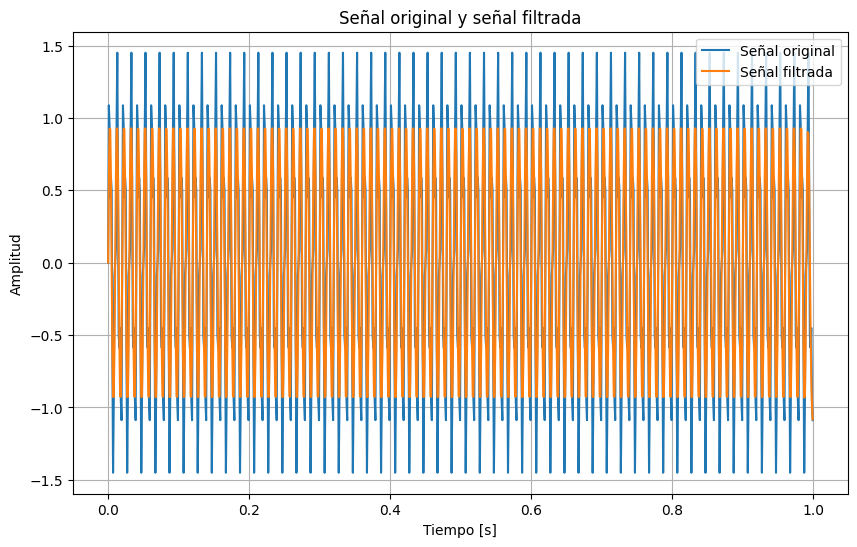

In [15]:
# Parámetros de la señal
Fs = 1000  # Frecuencia de muestreo en Hz
f_signal1 = 100  # Frecuencia de la primer señal en Hz
f_signal2 = 250  # Frecuencia de la segunda señal en Hz
t = np.arange(0, 1, 1/Fs)  # Vector de tiempo de 1 segundo
signal_input = np.sin(2 * np.pi * f_signal1 * t) + 0.5 * np.sin(2 * np.pi * f_signal2 * t)  # Señal compuesta


# Diseño del filtro antialias (filtro pasabajos)
f_cutoff = 150  # Frecuencia de corte en Hz
order = 4  # Orden del filtro (para modificar caída del filtro)
b, a = signal.butter(order, f_cutoff / (Fs / 2), 'low')  # Coeficientes del filtro

# Aplicar el filtro antialias
signal_filtered = signal.filtfilt(b, a, signal_input)

# Respuesta en frecuencia del filtro
w, h = signal.freqz(b, a)

# Graficar señal original y señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, signal_input, label='Señal original')
plt.plot(t, signal_filtered, label='Señal filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal original y señal filtrada')
plt.legend()
plt.grid(True)
plt.show()

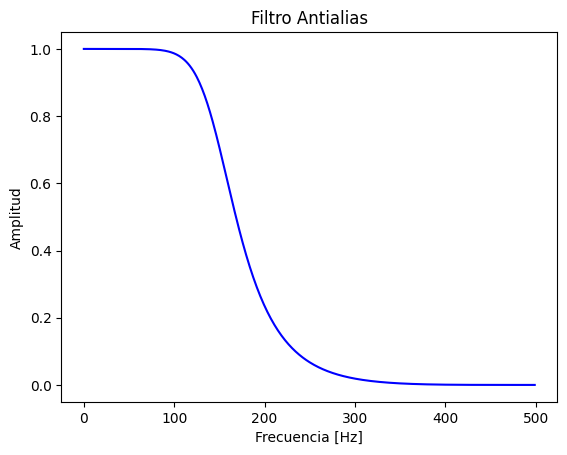

In [21]:
#Grafica del filtro
plt.plot(0.5 * Fs * w / np.pi, np.abs(h), 'b')
plt.title('Filtro Antialias')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.show()

In [18]:
# Calcular la transformada de Fourier de la señal original y la señal filtrada
fft_signal_input = np.fft.fft(signal_input)
fft_signal_filtered = np.fft.fft(signal_filtered)

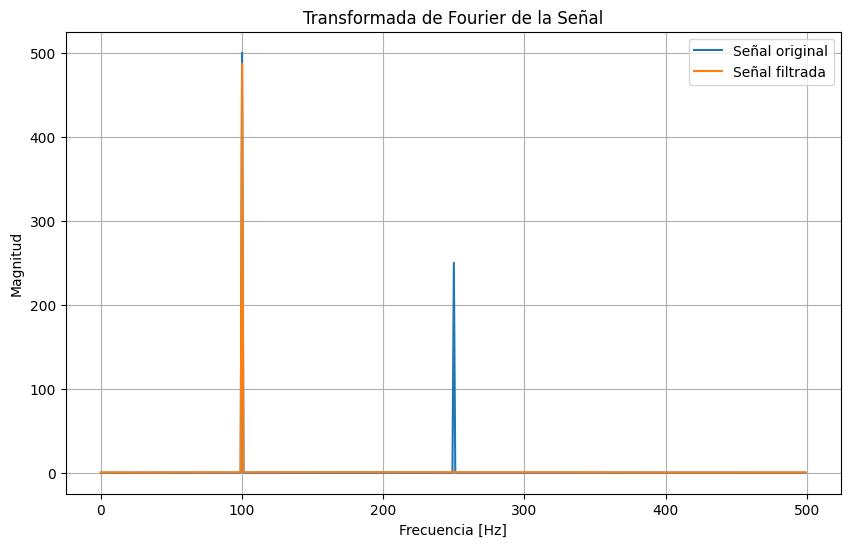

In [20]:
# Calcular las frecuencias correspondientes
freq = np.fft.fftfreq(len(signal_input), d=1/Fs)

# Graficar espectros de amplitud
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], np.abs(fft_signal_input)[:len(freq)//2], label='Señal original')
plt.plot(freq[:len(freq)//2], np.abs(fft_signal_filtered)[:len(freq)//2], label='Señal filtrada')
plt.title('Transformada de Fourier de la Señal')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True)
plt.show()

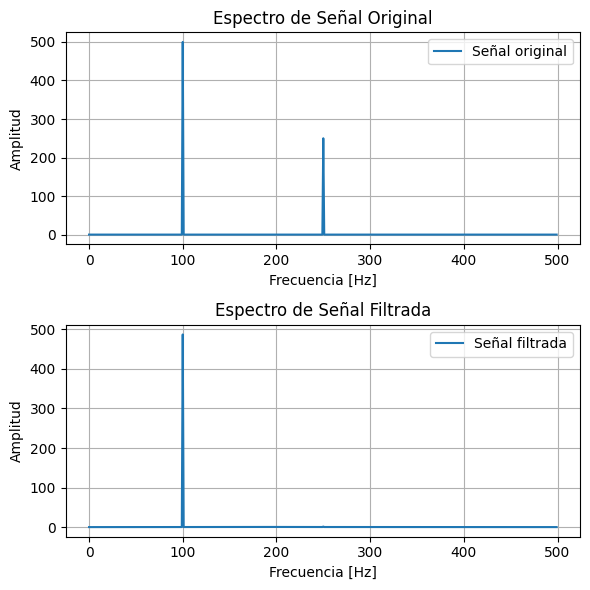

In [26]:
# Graficar especros de amplitud
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

axs[0].plot(freq[:len(freq)//2], np.abs(fft_signal_input)[:len(freq)//2], label='Señal original')
axs[0].set_title('Espectro de Señal Original')
axs[0].set_xlabel('Frecuencia [Hz]')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(freq[:len(freq)//2], np.abs(fft_signal_filtered)[:len(freq)//2], label='Señal filtrada')
axs[1].set_title('Espectro de Señal Filtrada')
axs[1].set_xlabel('Frecuencia [Hz]')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()